# Review: Most challenging MCQ questions!


Approaching SQL questions:

**Start with the holistic picture**
- Understand the database set up
- Understand relationships between tables and look for links
- Brief view of the tables (`SELECT * FROM table LIMIT 5;`)

**Then answer the questions**
- Read the question
- Break the question down into the tables and columns needed
- Attack it bit-by-bit

In [1]:
%load_ext sql

## Set Theory MCQ

In [2]:
%%sql

sqlite:///classlist.db

In [3]:
%%sql
SELECT * 
FROM exammarks
ORDER BY Surname
LIMIT 5


 * sqlite:///classlist.db
Done.


StudentNo,Surname,Name,Gender,DateOfBirth,Maths,Science,Biology,Accounting,CompSci
ANDHAR002,ANDERSEN,HAROLD,MALE,26011998.0,48,94,79,100,92
BARSUZ008,BARGER,SUZANNE,FEMALE,14081998.0,79,36,40,40,83
BECNAT003,BECKER,NATHANIEL,MALE,7021998.0,45,95,41,99,86
BLABRU006,BLAKE,BRUCE,MALE,14021998.0,44,90,61,58,41
BLADEL005,BLAND,DELORES,FEMALE,15121998.0,83,90,46,58,76


In [4]:
%%sql
SELECT * 
FROM supplementarymarks
ORDER BY Surname
LIMIT 5

 * sqlite:///classlist.db
Done.


StudentNo,Surname,Name,Gender,DateOfBirth,Maths,Science,Biology,Accounting,CompSci
ABRKEN007,ABRAMS,KENT,MALE,28021998.0,81,94,75,70,81
ANDHAR002,ANDERSEN,HAROLD,MALE,26011998.0,100,None,None,None,None
BARSUZ008,BARGER,SUZANNE,FEMALE,14081998.0,None,79,89,89,None
BECNAT003,BECKER,NATHANIEL,MALE,7021998.0,80,None,75,None,None
BLABRU006,BLAKE,BRUCE,MALE,14021998.0,90,None,None,None,72


### **Question 2**

How many students did not write any of their final exams?

**Options:** 
 - **5**
 - 95
 - 70
 - 25

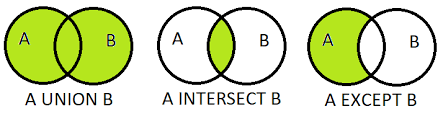

**Solution**

In [5]:
%%sql

SELECT COUNT(*)
FROM (
    SELECT s.StudentNo
    FROM Supplementarymarks s
    EXCEPT
    SELECT e.StudentNo 
    FROM Exammarks e)

 * sqlite:///classlist.db
Done.


COUNT(*)
5


In [6]:
%%sql 

SELECT COUNT(sm.StudentNo) - COUNT(em.StudentNo)
FROM Supplementarymarks sm 
LEFT JOIN exammarks em
    ON sm.StudentNo = em.StudentNo

 * sqlite:///classlist.db
Done.


COUNT(sm.StudentNo) - COUNT(em.StudentNo)
5


In [7]:
%%sql

SELECT COUNT(s.StudentNo)
FROM Supplementarymarks s
WHERE s.StudentNo NOT IN (SELECT e.StudentNo FROM Exammarks e)

 * sqlite:///classlist.db
Done.


COUNT(s.StudentNo)
5


### **Question 5**

How many students had to re-write their Maths and science exam? (hint: a passing mark is considered to be 50 or greater.)

**Options:**
 - 12
 - **4**
 - 20
 - 9

**Solution**

In [8]:
%%sql 

SELECT COUNT(StudentNo) FROM ExamMarks
WHERE Maths < 50 AND Science < 50

 * sqlite:///classlist.db
Done.


COUNT(StudentNo)
4


### **Question 6**

What was the average mark, rounded down, for students who wrote the supplementary accounting exam after missing the first?

**Options:**
 - 73
 - 79
 - **76**
 - 82
 
Important things to note here:
- wrote the supp = they will be in the supplementaryexams table
- after **missing** the first = they will either have NULL in the Accounting column in Exammarks, or won't be in the Exammarks table at all (missed all final exams)
- Let's see how many actually missed the first:

**Solution**

In [9]:
%%sql
--How many actually missed the first accounting exam?
SELECT * 
FROM exammarks em
WHERE em.accounting IS NULL

 * sqlite:///classlist.db
Done.


StudentNo,Surname,Name,Gender,DateOfBirth,Maths,Science,Biology,Accounting,CompSci


In [10]:
%%sql
SELECT round(avg(sm.accounting)) from supplementarymarks sm
left outer join exammarks em on sm.studentno = em.studentno
where em.accounting is null
limit 5

 * sqlite:///classlist.db
Done.


round(avg(sm.accounting))
76.0


In [11]:
%%sql

SELECT ROUND(AVG(s.Accounting)) AS "Average Accounting Mark"
FROM Supplementarymarks s
WHERE s.StudentNo NOT IN (SELECT e.StudentNo FROM Exammarks e)

 * sqlite:///classlist.db
Done.


Average Accounting Mark
76.0


In [12]:
%%sql

SELECT ROUND(AVG(s.Accounting))
FROM Supplementarymarks s
WHERE s.StudentNo IN (
    SELECT s.StudentNo
    FROM Supplementarymarks s
    EXCEPT
    SELECT e.StudentNo 
    FROM Exammarks e)

 * sqlite:///classlist.db
Done.


ROUND(AVG(s.Accounting))
76.0


### **Question 10**

Assuming all subjects are weighted equally, what was the average total mark, rounded down, for students who didn’t write any supplementary exams?
 
**Options:**
 - **74**
 - 66
 - 73
 - 76
 
Important to note:
- Average total mark - total average across all 5 subjects per student, then average across all students
- students who did NOT write any supps - meaning they will not appear in the supplementarymarks table. Exclude any students who wrote some final exams, some supps

**Solution**

In [13]:
%%sql

SELECT AVG((e.Maths+e.Accounting+e.CompSci+e.Science+e.Biology)/5) 
FROM ExamMarks e
WHERE e.StudentNo IN (
    SELECT e.StudentNo FROM Exammarks e
    EXCEPT
    SELECT s.StudentNo FROM Supplementarymarks s)

 * sqlite:///classlist.db
Done.


AVG((e.Maths+e.Accounting+e.CompSci+e.Science+e.Biology)/5)
74.6


## Joins MCQ

In [14]:
%%sql

sqlite:///TMDB.db

<img src="https://github.com/Explore-AI/Pictures/blob/master/TMDB_ER_diagram.png?raw=true" width=70%/>

### **Question 10**

How many movies are in the database that are both a Romance and a Comedy?

**Options:**

 - 373
 - **484**
 - 262
 - 595
 
Important to note:
- **both** Romance and Comedy
- Mapping means each record of a movie can only have one genre associated with it at a time. Multiple records for multiple genres for one movie.
- If we find all occurences of movies with either Romance or Comedy genres, the ones with more than one appearance are the ones with BOTH genres. We want to find the number of only the duplicate records.

**Solution**

In [15]:
%%sql 

SELECT (Count(gm.movie_id) - Count(DISTINCT(gm.movie_id)))
FROM genres g
LEFT JOIN genremap gm
    ON g.genre_id = gm.genre_id
LEFT JOIN movies m
    ON gm.movie_id = m.movie_id
WHERE (genre_name = 'Comedy' OR genre_name = 'Romance')

 * sqlite:///TMDB.db
   sqlite:///classlist.db
Done.


(Count(gm.movie_id) - Count(DISTINCT(gm.movie_id)))
484


In [16]:
%%sql
SELECT COUNT(*)
FROM(
SELECT gm.movie_id
FROM genres g
JOIN genremap gm
    ON g.genre_id = gm.genre_id
JOIN movies m
    ON gm.movie_id = m.movie_id
WHERE genre_name = 'Comedy' 
    
    INTERSECT

SELECT gm.movie_id
FROM genres g
JOIN genremap gm
    ON g.genre_id = gm.genre_id
JOIN movies m
    ON gm.movie_id = m.movie_id
WHERE genre_name = 'Romance')

 * sqlite:///TMDB.db
   sqlite:///classlist.db
Done.


COUNT(*)
484


## Optimising SQL Queries MCQ

In [17]:
%%sql

sqlite:///flights.db

<img src="https://github.com/Explore-AI/Pictures/blob/master/flights_ER_diagram.png?raw=true" width=40%/>

### **Question 3** 

How many flights departed on the 28th of January 2008?

**Options:**
- 540 908
- 20 149
- **19 495**
- 18 056

Important to note:
- Date - how is it written in the database?
- **departed**

**Solution**

In [18]:
%%sql

SELECT count(*) FROM flights
WHERE Date = '2008/1/28' AND Cancelled=0 

   sqlite:///TMDB.db
   sqlite:///classlist.db
 * sqlite:///flights.db
Done.


count(*)
19495


In [19]:
%time

%sql select count(*) from flights where date = '2008/1/28' and cancelled = 0

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 20 µs
   sqlite:///TMDB.db
   sqlite:///classlist.db
 * sqlite:///flights.db
Done.


count(*)
19495


In [20]:
%time 

%sql WITH CTE AS (SELECT flightnum, Date FROM flights WHERE Cancelled = '0' and date = '2008/1/28' ) SELECT count(*)FROM CTE;

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
   sqlite:///TMDB.db
   sqlite:///classlist.db
 * sqlite:///flights.db
Done.


count(*)
19495


### **Question 10**

Which domestic carrier had the best on-time performance (OTP), where OTP is defined as the rate of on time flights with a 15min buffer on departure and arrival?

**Options:**
-  American Airlines Inc
- **Hawaiian Airlines Inc**
- Comair Inc
- Aloha Airlines Inc


Important to note: 
- **RATE** of on-time flights
    - This should indicate some sort of proportion, percentage, etc..
    - We are essentially looking for number of on-time flights / number of total flights per each airline, to see which has the best rate of OTP

**Solution**

In [21]:
%%time
%%sql 

SELECT Description, total, on_time, (CAST(on_time as float) / CAST(total as float)) OTP 
FROM carriers
INNER JOIN (
    SELECT UniqueCarrier, count(*) AS total 
    FROM flights 
    GROUP BY UniqueCarrier ) as A
    ON carriers.code = A.UniqueCarrier
INNER JOIN (
    SELECT UniqueCarrier, count(*) on_time 
    FROM flights 
    WHERE DepDelay <=15 AND ArrDelay <=15 
    GROUP BY UniqueCarrier) as B
    ON carriers.code = B.UniqueCarrier
ORDER by OTP desc
LIMIT 5

   sqlite:///TMDB.db
   sqlite:///classlist.db
 * sqlite:///flights.db
Done.
CPU times: user 492 ms, sys: 36.1 ms, total: 528 ms
Wall time: 542 ms


Description,total,on_time,OTP
Hawaiian Airlines Inc.,4679,4409,0.9422953622568925
Aloha Airlines Inc.,4028,3727,0.9252730883813307
AirTran Airways Corporation,20519,15807,0.7703591792972367
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.),39226,30145,0.7684953857135574
Delta Air Lines Inc.,38256,29366,0.7676181514010874


In [22]:
%%time

%%sql 
SELECT
    c.Description, COUNT(*) AS TotalFlights, 
    SUM(CASE WHEN (f.DepDelay <= 15 AND f.ArrDelay <= 15 AND f.Cancelled = '0') THEN 1 ELSE 0 END) AS OnTimeFlights, 
    CAST(SUM(CASE WHEN (f.DepDelay <= 15 AND f.ArrDelay <= 15 AND f.Cancelled = '0') THEN 1 ELSE 0 END) AS float) / COUNT(*) AS OTP
FROM
    Flights f
INNER JOIN carriers c
ON f.UniqueCarrier = c.code
GROUP BY UniqueCarrier
HAVING TotalFlights > 0
ORDER BY OTP desc
LIMIT 5

   sqlite:///TMDB.db
   sqlite:///classlist.db
 * sqlite:///flights.db
Done.
CPU times: user 685 ms, sys: 79.9 ms, total: 765 ms
Wall time: 774 ms


Description,TotalFlights,OnTimeFlights,OTP
Hawaiian Airlines Inc.,4679,4409,0.9422953622568925
Aloha Airlines Inc.,4028,3727,0.9252730883813307
AirTran Airways Corporation,20519,15807,0.7703591792972367
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.),39226,30145,0.7684953857135574
Delta Air Lines Inc.,38256,29366,0.7676181514010874
